# Importing modules

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.ticker import (AutoMinorLocator, MultipleLocator)
import time
import random
import math
from IPython.display import clear_output

# Importing own code

In [2]:
from generateSpace import *
from plotLattice import *
from getTriangleLengths import *
from potentialEnergyPerTrio import *
from potentialEnergy import *
from potentialEnergyPerParticle import *
from numberOfCalculations import *
from makeRandomDatabase import *

## Auxiliarycode

In [3]:
def return1(lengths):
    return 1

def predictedCalculationTime(numberOfSurroundingCells, numberOfParticlesPerCell = 4, timePerTriangle = 15*(10**-6)):
    
    return timePerTriangle * numberOfCalculationsGeneration(numberOfSurroundingCells, numberOfParticlesPerCell)

predictedCalculationTime(4, 4)

3.0912599999999997

# Testing

## Testing functionality

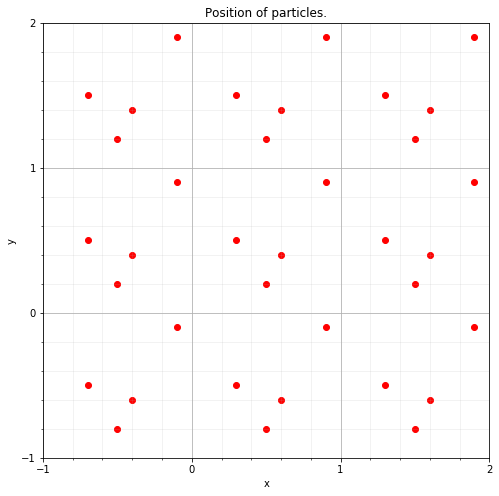

1928697.3439302002

In [4]:
atoms = [np.array([0.3, 0.5]), np.array([0.9, 0.9]), np.array([0.6, 0.4]), np.array([0.5, 0.2])]

totalSpace = generateSpace(atoms, 1, 1.0, False)
plotLattice(totalSpace)

otherSpace = generateSpace(atoms, 1, 1.0)

potentialEnergy(otherSpace, atoms, potentialEnergyPerTrio)

In [5]:
potentialEnergy(generateSpace(atoms, 4, 1.0), atoms, return1)# Results from wolfram are 206084

206084

## Testing quality of potential energy particle

In [6]:
def potentialEnergyPerTrioExperimental(lengths, E0=1, Rc=1):
    """
    """
    Mc = 1/3
    A0 = 4
    
    a = Mc * lengths[0] / Rc
    b = Mc * lengths[1] / Rc
    c = Mc * lengths[2] / Rc
    
    #s = (a + b + c) / 2
    #area2Triangle = s * (s - a) * (s - b) * (s - c)
    
    longRangePotential = -((a + b + c)**-6)
    shortRangePotential = longRangePotential**2
    
    return E0 * A0 * (shortRangePotential + longRangePotential)

-0.9999020484832781
-0.0009763240814208984


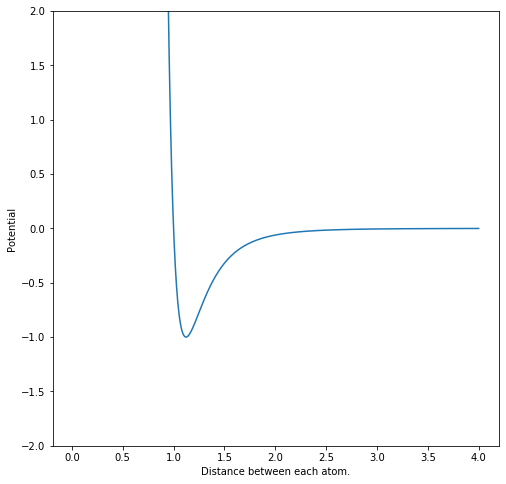

In [7]:
yCoordinates = np.linspace(0.01, 4, 1000, endpoint=True)

results =[]

for yCoordinate in yCoordinates:
    results.append(potentialEnergyPerTrioExperimental([yCoordinate, yCoordinate, yCoordinate]))

fig, ax = plt.subplots(figsize=(8, 8))
plt.ylim(-2, 2)
ax.plot(yCoordinates, results)
ax.set_xlabel('Distance between each atom.')
ax.set_ylabel('Potential')
print(min(results))
print(potentialEnergyPerTrioExperimental([max(yCoordinates), max(yCoordinates), max(yCoordinates)]))

-150.04973408421216
4046.5416235191888


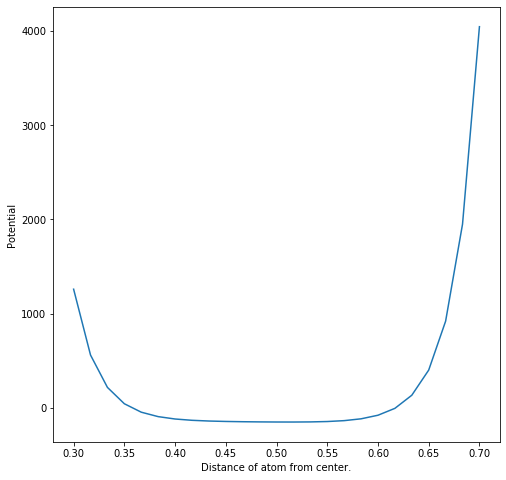

In [8]:
widthOfCell = 2
yCoordinates = np.linspace(0.3*widthOfCell/2, 0.7*widthOfCell/2, 25, endpoint=True)

results =[]

for yCoordinate in yCoordinates:
    particles = [np.array([widthOfCell / 2 + yCoordinate, widthOfCell / 2 + yCoordinate]), np.array([widthOfCell / 2 + yCoordinate, widthOfCell / 2 - yCoordinate]), np.array([widthOfCell / 2 - yCoordinate, widthOfCell / 2 + yCoordinate]), np.array([widthOfCell / 2 - yCoordinate, widthOfCell / 2 - yCoordinate])]
    otherSpace = generateSpace(particles, 4, widthOfCell)
    results.append(potentialEnergy(otherSpace, particles, potentialEnergyPerTrioExperimental))

fig, ax = plt.subplots(figsize=(8, 8))
ax.plot(yCoordinates, results)
ax.set_xlabel('Distance of atom from center.')
ax.set_ylabel('Potential')
print(min(results))
print(max(results))

## Checking convergence

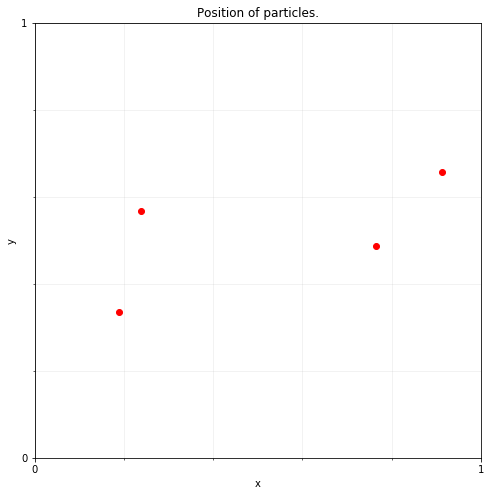

22083.3524723745
2254688.7576118745
2254376.239425048
2254251.047808914
2254198.4057589998
2254171.5409220783
2254156.0204085545
2254146.2554216753
2254139.7170451586


"\nfig, ax = plt.subplots(figsize=(8, 8))\nax.plot(numberOfSurroundingCells, timeForCalculation)\nax.set_title('Time needed for the calculation (seconds) vs number of surrounding cells')\nax.set_xlabel('Number of surrounding cells')\nax.set_ylabel('Time needed for the calculation (seconds)')"

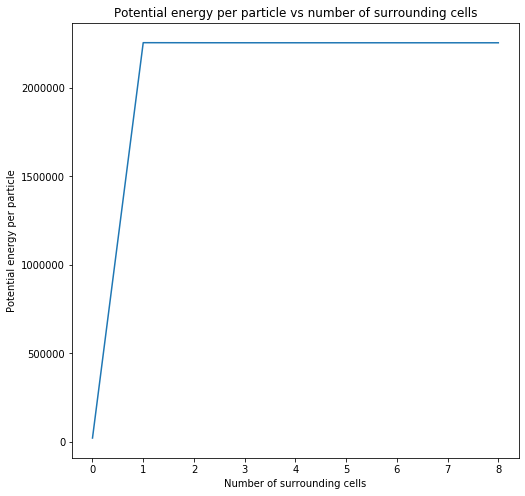

In [9]:
numberOfSurroundingCells = [i for i in range(0,9)]

potentialEnergyResults = []
timeForCalculation = []

widthOfCell = 1.0

atoms = [np.array([random.uniform(0, widthOfCell), random.uniform(0, widthOfCell)]) for j in range(0, 4)]

plotLattice(atoms, widthOfCell)

for i in numberOfSurroundingCells:
    #print('Calculating with ' + str(i) + ' surrounding cells.')
    
    space = generateSpace(atoms, i, widthOfCell)
    
    timeStart = time.time()
    potentialEnergyResults.append(potentialEnergyPerParticle(space, atoms, potentialEnergyPerTrioExperimental))
    timeEnd = time.time()
    #print((timeEnd - timeStart))
    timeForCalculation.append((timeEnd - timeStart))
    
[print(i) for i in potentialEnergyResults]

fig, ax = plt.subplots(figsize=(8, 8))
ax.plot(numberOfSurroundingCells, potentialEnergyResults)
ax.set_title('Potential energy per particle vs number of surrounding cells')
ax.set_xlabel('Number of surrounding cells')
ax.set_ylabel('Potential energy per particle')

"""
fig, ax = plt.subplots(figsize=(8, 8))
ax.plot(numberOfSurroundingCells, timeForCalculation)
ax.set_title('Time needed for the calculation (seconds) vs number of surrounding cells')
ax.set_xlabel('Number of surrounding cells')
ax.set_ylabel('Time needed for the calculation (seconds)')"""

Using the standard lattice
1874055.8390242544
1932424.7343159597
1932081.369403817
1931957.2432000525
1931904.7920120943
1931877.9779731883
1931862.4751854863
1931852.71761699
1931846.1827726648


"\nfig, ax = plt.subplots(figsize=(8, 8))\nax.plot(numberOfSurroundingCells, timeForCalculation)\nax.set_title('Time needed for the calculation (seconds) vs number of surrounding cells')\nax.set_xlabel('Number of surrounding cells')\nax.set_ylabel('Time needed for the calculation (seconds)')"

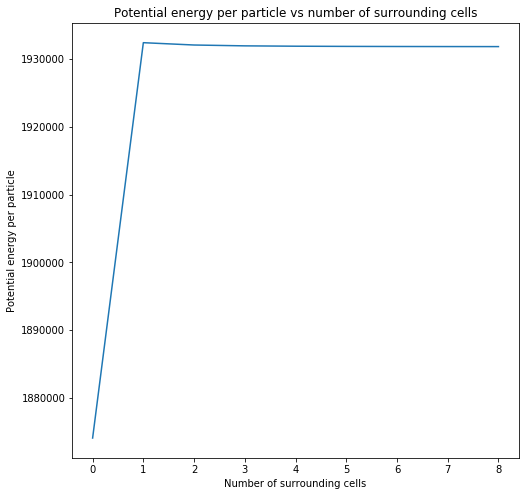

In [10]:
numberOfSurroundingCells = [i for i in range(0, 9)]

potentialEnergyResults = []
timeForCalculation = []

widthOfCell = 1.0

atoms = [widthOfCell * np.array([0.3, 0.5]), widthOfCell * np.array([0.9, 0.9]), widthOfCell * np.array([0.6, 0.4]), widthOfCell * np.array([0.5, 0.2])]

print('Using the standard lattice')#plotLattice(atoms)

for i in numberOfSurroundingCells:
    #print('Calculating with ' + str(i) + ' surrounding cells.')
    
    space = generateSpace(atoms, i, widthOfCell)
    
    timeStart = time.time()
    potentialEnergyResults.append(potentialEnergyPerParticle(space, atoms, potentialEnergyPerTrioExperimental))
    timeEnd = time.time()
    #print((timeEnd - timeStart))
    timeForCalculation.append((timeEnd - timeStart))
    
[print(i) for i in potentialEnergyResults]

fig, ax = plt.subplots(figsize=(8, 8))
ax.plot(numberOfSurroundingCells, potentialEnergyResults)
ax.set_title('Potential energy per particle vs number of surrounding cells')
ax.set_xlabel('Number of surrounding cells')
ax.set_ylabel('Potential energy per particle')

"""
fig, ax = plt.subplots(figsize=(8, 8))
ax.plot(numberOfSurroundingCells, timeForCalculation)
ax.set_title('Time needed for the calculation (seconds) vs number of surrounding cells')
ax.set_xlabel('Number of surrounding cells')
ax.set_ylabel('Time needed for the calculation (seconds)')"""

Using the standard lattice
434.98551488962755
414.4529150422033
407.7277989705618
405.7695043323266
404.9488227447606
404.5297157924567
404.2874594254771
404.13499128923206
404.03288254007845


"\nfig, ax = plt.subplots(figsize=(8, 8))\nax.plot(numberOfSurroundingCells, timeForCalculation)\nax.set_title('Time needed for the calculation (seconds) vs number of surrounding cells')\nax.set_xlabel('Number of surrounding cells')\nax.set_ylabel('Time needed for the calculation (seconds)')"

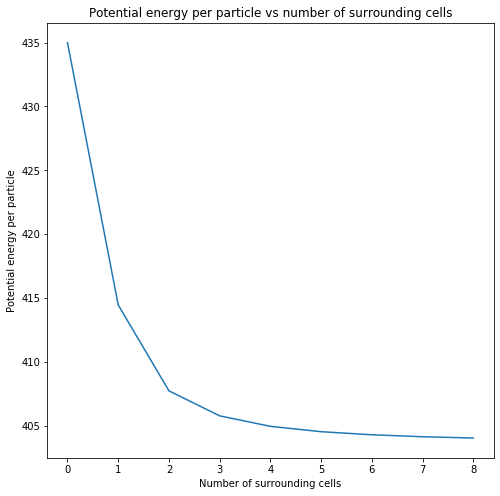

In [11]:
numberOfSurroundingCells = [i for i in range(0, 9)]

potentialEnergyResults = []
timeForCalculation = []

widthOfCell = 2.0

atoms = [widthOfCell * np.array([0.3, 0.5]), widthOfCell * np.array([0.9, 0.9]), widthOfCell * np.array([0.6, 0.4]), widthOfCell * np.array([0.5, 0.2])]

print('Using the standard lattice')#plotLattice(atoms)

for i in numberOfSurroundingCells:
    #print('Calculating with ' + str(i) + ' surrounding cells.')
    
    space = generateSpace(atoms, i, widthOfCell)
    
    timeStart = time.time()
    potentialEnergyResults.append(potentialEnergyPerParticle(space, atoms, potentialEnergyPerTrioExperimental))
    timeEnd = time.time()
    #print((timeEnd - timeStart))
    timeForCalculation.append((timeEnd - timeStart))
    
[print(i) for i in potentialEnergyResults]

fig, ax = plt.subplots(figsize=(8, 8))
ax.plot(numberOfSurroundingCells, potentialEnergyResults)
ax.set_title('Potential energy per particle vs number of surrounding cells')
ax.set_xlabel('Number of surrounding cells')
ax.set_ylabel('Potential energy per particle')

"""
fig, ax = plt.subplots(figsize=(8, 8))
ax.plot(numberOfSurroundingCells, timeForCalculation)
ax.set_title('Time needed for the calculation (seconds) vs number of surrounding cells')
ax.set_xlabel('Number of surrounding cells')
ax.set_ylabel('Time needed for the calculation (seconds)')"""

Using the standard lattice
-0.246109379132858
-0.7946037587753071
-0.9000157382441727
-0.9306186873534175
-0.9434421134715486
-0.9499906931936627
-0.9537759551067247
-0.9561582712317362
-0.9577537208782942


"\nfig, ax = plt.subplots(figsize=(8, 8))\nax.plot(numberOfSurroundingCells, timeForCalculation)\nax.set_title('Time needed for the calculation (seconds) vs number of surrounding cells')\nax.set_xlabel('Number of surrounding cells')\nax.set_ylabel('Time needed for the calculation (seconds)')"

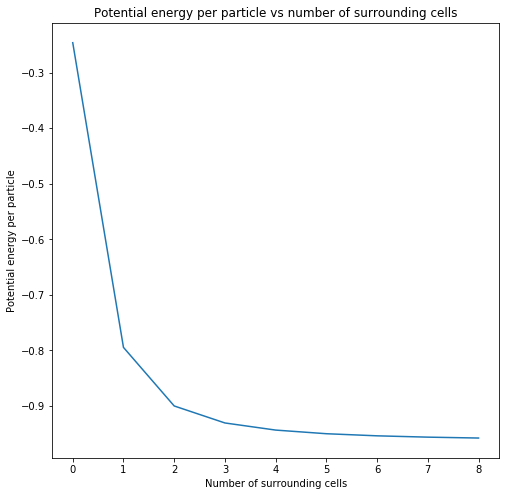

In [12]:
numberOfSurroundingCells = [i for i in range(0, 9)]

potentialEnergyResults = []
timeForCalculation = []

widthOfCell = 4.0

atoms = [widthOfCell * np.array([0.3, 0.5]), widthOfCell * np.array([0.9, 0.9]), widthOfCell * np.array([0.6, 0.4]), widthOfCell * np.array([0.5, 0.2])]

print('Using the standard lattice')#plotLattice(atoms)

for i in numberOfSurroundingCells:
    #print('Calculating with ' + str(i) + ' surrounding cells.')
    
    space = generateSpace(atoms, i, widthOfCell)
    
    timeStart = time.time()
    potentialEnergyResults.append(potentialEnergyPerParticle(space, atoms, potentialEnergyPerTrioExperimental))
    timeEnd = time.time()
    #print((timeEnd - timeStart))
    timeForCalculation.append((timeEnd - timeStart))
    
[print(i) for i in potentialEnergyResults]

fig, ax = plt.subplots(figsize=(8, 8))
ax.plot(numberOfSurroundingCells, potentialEnergyResults)
ax.set_title('Potential energy per particle vs number of surrounding cells')
ax.set_xlabel('Number of surrounding cells')
ax.set_ylabel('Potential energy per particle')

"""
fig, ax = plt.subplots(figsize=(8, 8))
ax.plot(numberOfSurroundingCells, timeForCalculation)
ax.set_title('Time needed for the calculation (seconds) vs number of surrounding cells')
ax.set_xlabel('Number of surrounding cells')
ax.set_ylabel('Time needed for the calculation (seconds)')"""

Using the standard lattice
-0.005564882400826709
-0.014190691190900722
-0.01583783443476219
-0.01631600663651477
-0.01651637273706993
-0.016618694303428952
-0.016677839022329374
-0.016715062712148728
-0.016739991612984374


"\nfig, ax = plt.subplots(figsize=(8, 8))\nax.plot(numberOfSurroundingCells, timeForCalculation)\nax.set_title('Time needed for the calculation (seconds) vs number of surrounding cells')\nax.set_xlabel('Number of surrounding cells')\nax.set_ylabel('Time needed for the calculation (seconds)')"

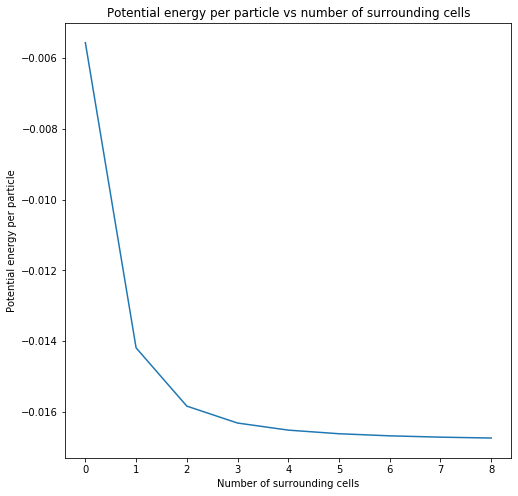

In [13]:
numberOfSurroundingCells = [i for i in range(0, 9)]

potentialEnergyResults = []
timeForCalculation = []

widthOfCell = 8.0

atoms = [widthOfCell * np.array([0.3, 0.5]), widthOfCell * np.array([0.9, 0.9]), widthOfCell * np.array([0.6, 0.4]), widthOfCell * np.array([0.5, 0.2])]

print('Using the standard lattice')#plotLattice(atoms)

for i in numberOfSurroundingCells:
    #print('Calculating with ' + str(i) + ' surrounding cells.')
    
    space = generateSpace(atoms, i, widthOfCell)
    
    timeStart = time.time()
    potentialEnergyResults.append(potentialEnergyPerParticle(space, atoms, potentialEnergyPerTrioExperimental))
    timeEnd = time.time()
    #print((timeEnd - timeStart))
    timeForCalculation.append((timeEnd - timeStart))
    
[print(i) for i in potentialEnergyResults]

fig, ax = plt.subplots(figsize=(8, 8))
ax.plot(numberOfSurroundingCells, potentialEnergyResults)
ax.set_title('Potential energy per particle vs number of surrounding cells')
ax.set_xlabel('Number of surrounding cells')
ax.set_ylabel('Potential energy per particle')

"""
fig, ax = plt.subplots(figsize=(8, 8))
ax.plot(numberOfSurroundingCells, timeForCalculation)
ax.set_title('Time needed for the calculation (seconds) vs number of surrounding cells')
ax.set_xlabel('Number of surrounding cells')
ax.set_ylabel('Time needed for the calculation (seconds)')"""

## Testing and predicting fucntion speed

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
[1.9812583923339845e-06, 8.406543731689453e-05, 0.0002400331497192383, 0.0004721059799194336, 0.0007861771583557129, 0.001190286636352539, 0.0016483969688415527, 0.002222498893737793, 0.002858643054962158, 0.003496598243713379, 0.004277369499206543]


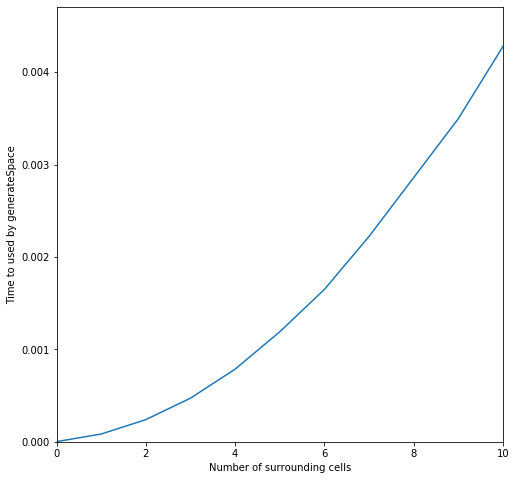

In [14]:
numberOfMeasurements = 500

xVariable = [i for i in range(0, 11)]
yVariable =[]

for i in xVariable:
    timeStart = time.time()
    [generateSpace(atoms, i, 1.0) for j in range(numberOfMeasurements)]
    timeEnd = time.time()
    yVariable.append((timeEnd - timeStart)/numberOfMeasurements)
    
fig, ax = plt.subplots(figsize=(8, 8))
ax.plot(xVariable, yVariable)
ax.set_xlabel('Number of surrounding cells')
ax.set_ylabel('Time to used by generateSpace')
ax.set_xlim([min(xVariable), max(xVariable)])
ax.set_ylim([0, 1.1 * max(yVariable)])

print(xVariable)
print(yVariable)

In [15]:
%timeit potentialEnergyPerTrio(getTriangleLengths(np.array([0.3, 0.5]), np.array([0.9, 0.9]), np.array([0.6, 0.4])))

17.1 µs ± 77.1 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [ ]:
numberOfMeasurements = 3

atoms = [np.array([random.uniform(0, 5.0), random.uniform(0, 5.0)]) for j in range(0, 4)]

xVariable = [i for i in range(0, 11)]
yVariable =[]

for i in xVariable:
    print('Calculating with ' + str(i) + ' surrounding cells.')
    space = generateSpace(atoms, i, 1.0)
    timeStart = time.time()
    [potentialEnergyPerParticle(space, atoms, potentialEnergyPerTrio) for j in range(numberOfMeasurements)]
    timeEnd = time.time()
    print((timeEnd - timeStart)/numberOfMeasurements)
    yVariable.append((timeEnd - timeStart)/numberOfMeasurements)

print('')
yVariablePredict = [predictedCalculationTime(i, len(atoms)) for i in xVariable]

fig, ax = plt.subplots(figsize=(8, 8))
ax.plot(xVariable, yVariable)
ax.plot(xVariable, yVariablePredict, c='r')
plt.legend(['Actual time', 'Predicted time' ], loc=4)
ax.set_xlabel('Number of surrounding cells')
ax.set_ylabel('Time to used by potentialEnergyPerParticle')
ax.set_xlim([min(xVariable), max(xVariable)])
ax.set_ylim([0, 1.1 * max(yVariable)])

print(xVariable)
print(yVariable)
print(yVariablePredict)

Calculating with 0 surrounding cells.
0.00033362706502278644
Calculating with 1 surrounding cells.
0.031864007314046226
Calculating with 2 surrounding cells.
0.2562111218770345
Calculating with 3 surrounding cells.
1.0064306259155273
Calculating with 4 surrounding cells.
2.8005658785502114
Calculating with 5 surrounding cells.
6.268235524495442
Calculating with 6 surrounding cells.
12.23349666595459
Calculating with 7 surrounding cells.
21.74998148282369
Calculating with 8 surrounding cells.
36.069018602371216
Calculating with 9 surrounding cells.
69.98744368553162
Calculating with 10 surrounding cells.


In [ ]:
def test(listVectors):
    vectorA = listVectors[0]
    vectorB = listVectors[1]
    diffrences = vectorA - vectorB
    sum = math.pow(diffrences.dot(diffrences), -1)
    

%timeit test([np.array([1, 0]), np.array([1.0, 2])])